[Apprentissage supervisé vs App. non-supervisé](https://le-datascientist.fr/apprentissage-supervise-vs-non-supervise)

[Qu'est ce que- K-Means](https://openclassrooms.com/fr/courses/4525281-realisez-une-analyse-exploratoire-de-donnees/5177935-decouvrez-l-algorithme-k-means)

[K-Means - Illustration](https://www.naftaliharris.com/blog/visualizing-k-means-clustering/)

[sklearn - Clustering](https://scikit-learn.org/stable/modules/clustering.html) ; [sklearn - KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans)


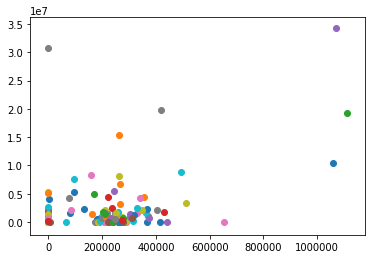

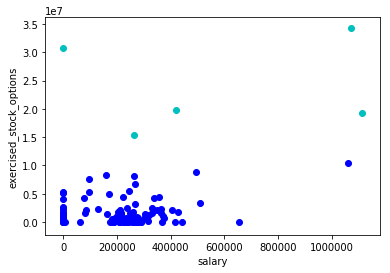

In [11]:
%matplotlib inline

""" 
    Skeleton code for k-means clustering mini-project.
"""




import pickle
import numpy
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import sys
sys.path.append("../tools/")
from feature_format import featureFormat, targetFeatureSplit




def Draw(pred, features, poi, mark_poi=False, name="image.png", f1_name="feature 1", f2_name="feature 2"):
    """ some plotting code designed to help you visualize your clusters """

    ### plot each cluster with a different color--add more colors for
    ### drawing more than five clusters
    colors = ["b", "c", "k", "m", "g"]
    for ii, pp in enumerate(pred):
        plt.scatter(features[ii][0], features[ii][1], color = colors[pred[ii]])

    ### if you like, place red stars over points that are POIs (just for funsies)
    if mark_poi:
        for ii, pp in enumerate(pred):
            if poi[ii]:
                plt.scatter(features[ii][0], features[ii][1], color="r", marker="*")
    plt.xlabel(f1_name)
    plt.ylabel(f2_name)
    #plt.savefig(name)
    plt.show()



### load in the dict of dicts containing all the data on each person in the dataset
data_dict = pickle.load( open("../final_project/final_project_dataset.pkl", "r") )
### there's an outlier--remove it! 
data_dict.pop("TOTAL", 0)


### the input features we want to use 
### can be any key in the person-level dictionary (salary, director_fees, etc.) 
feature_1 = "salary"
feature_2 = "exercised_stock_options"
feature_3 = "total_payments"
poi  = "poi"
features_list = [poi, feature_1, feature_2]
data = featureFormat(data_dict, features_list )
poi, finance_features = targetFeatureSplit( data )


### in the "clustering with 3 features" part of the mini-project,
### you'll want to change this line to 
### for f1, f2, _ in finance_features:
### (as it's currently written, the line below assumes 2 features)


    
for f1, f2 in finance_features:
    plt.scatter( f1, f2 )
plt.show()

### cluster here; create predictions of the cluster labels
### for the data and store them to a list called pred

pred=[]
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, n_init=10, max_iter=300).fit(finance_features)
    #n_clusters : Nbre de cluster, DUH / n_init : Nbre de redémarrage (avec répartition aléatoire) / 
    #max_iter : Nbre d'iterations classiques (calcul barycentre -> décalage du centre de cluster ->
        #coupe aux milieux -> Agglo des clusters & on recommence)
pred = kmeans.labels_



### rename the "name" parameter when you change the number of features
### so that the figure gets saved to a different file
try:
    Draw(pred, finance_features, poi, mark_poi=False, name="clusters.pdf", f1_name=feature_1, f2_name=feature_2)
except NameError:
    print "no predictions object named pred found, no clusters to plot"


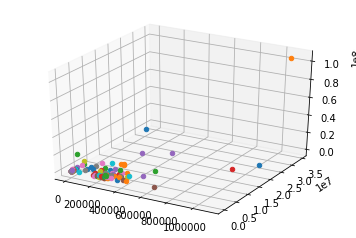

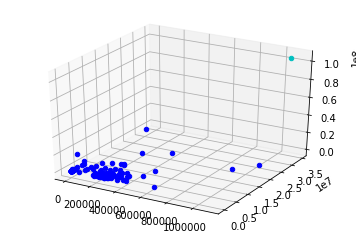

In [10]:
#En 3D (because 3 features), ma gueule !!

%matplotlib inline

""" 
    Skeleton code for k-means clustering mini-project.
"""




import pickle
import numpy
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import sys
sys.path.append("../tools/")
from feature_format import featureFormat, targetFeatureSplit




#def Draw(pred, features, poi, mark_poi=False, name="image.png", f1_name="feature 1", f2_name="feature 2"):
def Draw(pred, features, poi, mark_poi=False):

    """ some plotting code designed to help you visualize your clusters """
    
    fig2 = plt.figure()
    ax2 = fig2.add_subplot(111, projection='3d')
    
    ### plot each cluster with a different color--add more colors for
    ### drawing more than five clusters
    colors = ["b", "c", "k", "m", "g"]
    for ii, pp in enumerate(pred):
        ax2.scatter(features[ii][0], features[ii][1], features[ii][2], color = colors[pred[ii]])
    
    """
    ### if you like, place red stars over points that are POIs (just for funsies)
    if mark_poi:
        for ii, pp in enumerate(pred):
            if poi[ii]:
                plt.scatter(features[ii][0], features[ii][1], color="r", marker="*")
    """
    
    #plt.xlabel(f1_name)
    #plt.ylabel(f2_name)
    #plt.savefig(name)
    plt.show()



### load in the dict of dicts containing all the data on each person in the dataset
data_dict = pickle.load( open("../final_project/final_project_dataset.pkl", "r") )
### there's an outlier--remove it! 
data_dict.pop("TOTAL", 0)


### the input features we want to use 
### can be any key in the person-level dictionary (salary, director_fees, etc.) 
feature_1 = "salary"
feature_2 = "exercised_stock_options"
feature_3 = "total_payments"
poi  = "poi"
features_list = [poi, feature_1, feature_2, feature_3]
data = featureFormat(data_dict, features_list )
poi, finance_features = targetFeatureSplit( data )


### in the "clustering with 3 features" part of the mini-project,
### you'll want to change this line to 
### for f1, f2, _ in finance_features:
### (as it's currently written, the line below assumes 2 features)

fig1 = plt.figure()
ax1 = fig1.add_subplot(111, projection='3d')
    
for f1, f2, f3 in finance_features:
    #plt.scatter( f1, f2 )
    ax1.scatter(f1, f2, f3)
plt.show()

### cluster here; create predictions of the cluster labels
### for the data and store them to a list called pred

pred=[]
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, n_init=10, max_iter=300).fit(finance_features)
    #n_clusters : Nbre de cluster, DUH / n_init : Nbre de redémarrage (avec répartition aléatoire) / 
    #max_iter : Nbre d'iterations classiques (calcul barycentre -> décalage du centre de cluster ->
        #coupe aux milieux -> Agglo des clusters & on recommence)
        
    #2- On tourne avec 3 features
    #J'ai opté pour une représentation 3D et ce même si on y voit rien (c'est con mais c'est beau)
pred = kmeans.labels_



### rename the "name" parameter when you change the number of features
### so that the figure gets saved to a different file
try:
    #Draw(pred, finance_features, poi, mark_poi=False, name="clusters.pdf", f1_name=feature_1, f2_name=feature_2)
    Draw(pred, finance_features, poi, mark_poi=False)
    
except NameError:
    print "no predictions object named pred found, no clusters to plot"
